In [ ]:
# Armin Panjehpour - 98101288 - Computational Intelligence - HW2 - Q.1

In [47]:
# libraries needed
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Q.1

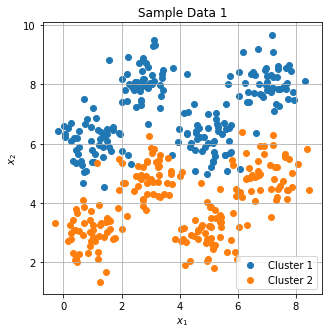

In [48]:
# Part.1.1 ------ Plot Data
data = np.array(scipy.io.loadmat('SampleData1.mat')['TrainingData']).T
labels = np.array(scipy.io.loadmat('SampleData1.mat')['TrainingLabels']).T

# cluster1
data1 = data[np.where(labels == 0)[0],:]

# cluster2 
data2 = data[np.where(labels == 1)[0],:]


fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(data1[:,0],data1[:,1])
ax.scatter(data2[:,0],data2[:,1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Sample Data 1')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2']);
plt.savefig('1.1.png')

In [49]:
# Part.1.2 ------ Train-Validation Split
from sklearn.model_selection import train_test_split


print(data.shape,labels.shape)

# select 20% of train data as validation data
data_tr, data_val, labels_tr, labels_val = train_test_split(data, labels, test_size = 0.3, random_state = 0)
print(data_tr.shape, data_val.shape, labels_tr.shape, labels_val.shape)

(400, 2) (400, 1)
(280, 2) (120, 2) (280, 1) (120, 1)


In [50]:
# Part.1.3 ------ MLP on data
# Normalize Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_tr)
print(scaler.mean_.shape)
data_tr_norm = scaler.transform(data_tr)
data_val_norm = scaler.transform(data_val)

(2,)


In [66]:
# Part.1.3 ------ MLP on data
# CREATE MLP MODEL
# Setting up the layers

from tensorflow.keras.layers import Input, Dense, Activation

model = keras.Sequential([
                      Input(shape = (2,)), # input layer
                      Dense(units = 3), # hidden layer one
                      Activation(activation = tf.math.sigmoid), # fact = sigmoid
                      Dense(units = 1), # output layer
                      Activation(activation = tf.math.sigmoid), # fact = sigmoid
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 3)                 9         
                                                                 
 activation_10 (Activation)  (None, 3)                 0         
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
 activation_11 (Activation)  (None, 1)                 0         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Part.1.3 ------ MLP on data
# Compling the model

# make our model ready for training
# 1. optimizer 2. loss function 3. metrics

model.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.01),
    loss = keras.losses.MeanSquaredError(),
    metrics = ['accuracy']
)

In [68]:
# Part.1.3 ------ MLP on data

from tensorflow.keras.callbacks import EarlyStopping

er_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# Training the model
# using .fit in keras
# inputs of .fit : 1. Train/Val Data 2. Batch Size(go over samples window size)
# 3. Number of Epochs(number of repeatation on all samples) 4. Callbacks


hist = model.fit(
    data_tr_norm,
    labels_tr,
    batch_size = 1,
    epochs = 50,
    validation_data = (data_val_norm, labels_val),
    callbacks = [er_stop]
)


Epoch 1/50
280/280 [==============================] - 0s 918us/step - loss: 0.2929 - accuracy: 0.3821 - val_loss: 0.2764 - val_accuracy: 0.3000
Epoch 2/50
280/280 [==============================] - 0s 707us/step - loss: 0.2738 - accuracy: 0.3071 - val_loss: 0.2629 - val_accuracy: 0.4750
Epoch 3/50
280/280 [==============================] - 0s 690us/step - loss: 0.2622 - accuracy: 0.3679 - val_loss: 0.2536 - val_accuracy: 0.5000
Epoch 4/50
280/280 [==============================] - 0s 690us/step - loss: 0.2540 - accuracy: 0.4893 - val_loss: 0.2460 - val_accuracy: 0.5417
Epoch 5/50
280/280 [==============================] - 0s 715us/step - loss: 0.2471 - accuracy: 0.5500 - val_loss: 0.2389 - val_accuracy: 0.5750
Epoch 6/50
280/280 [==============================] - 0s 693us/step - loss: 0.2409 - accuracy: 0.5643 - val_loss: 0.2321 - val_accuracy: 0.5917
Epoch 7/50
280/280 [==============================] - 0s 693us/step - loss: 0.2346 - accuracy: 0.6071 - val_loss: 0.2252 - val_accuracy:

<class 'keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
50


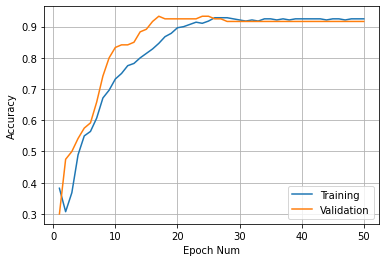

In [69]:
# Part.1.3 ------ MLP on data
# Loss & Accuracy Plots

print(type(hist))
print(hist.history.keys())

# number of epochs
n_epochs = len(hist.history['accuracy'])
print(n_epochs)

epochs = np.arange(1, n_epochs+1)

fig, ax = plt.subplots()
ax.plot(epochs, hist.history['accuracy'])
ax.plot(epochs, hist.history['val_accuracy'])
ax.grid(True)
ax.set_xlabel('Epoch Num')
ax.set_ylabel('Accuracy')
ax.legend(['Training','Validation']);
plt.savefig('1.2.png')

In [70]:
# Part.1.4 ------ RBF on data
import keras.optimizers
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import RMSprop
from rbflayer import RBFLayer, InitCentersRandom
from kmeans_initializer import InitCentersKMeans

model = Sequential()
rbfLayer = RBFLayer(8,
                   initializer = InitCentersKMeans(data_tr_norm),
                   betas = 1,
                   input_shape = (2,))

model.add(rbfLayer)
model.add(Dense(1))

model.compile(loss = 'mean_squared_error',
              optimizer = RMSprop())

model.fit(
    data_tr_norm,
    labels_tr,
    batch_size = 1,
    epochs = 50,
    verbose=1)



Epoch 1/50
280/280 [==============================] - 0s 497us/step - loss: 0.5660
Epoch 2/50
280/280 [==============================] - 0s 475us/step - loss: 0.3544
Epoch 3/50
280/280 [==============================] - 0s 474us/step - loss: 0.2358
Epoch 4/50
280/280 [==============================] - 0s 478us/step - loss: 0.1608
Epoch 5/50
280/280 [==============================] - 0s 476us/step - loss: 0.1152
Epoch 6/50
280/280 [==============================] - 0s 500us/step - loss: 0.0902
Epoch 7/50
280/280 [==============================] - 0s 494us/step - loss: 0.0751
Epoch 8/50
280/280 [==============================] - 0s 515us/step - loss: 0.0659
Epoch 9/50
280/280 [==============================] - 0s 479us/step - loss: 0.0615
Epoch 10/50
280/280 [==============================] - 0s 468us/step - loss: 0.0577
Epoch 11/50
280/280 [==============================] - 0s 475us/step - loss: 0.0550
Epoch 12/50
280/280 [==============================] - 0s 468us/step - loss: 0.0530
E

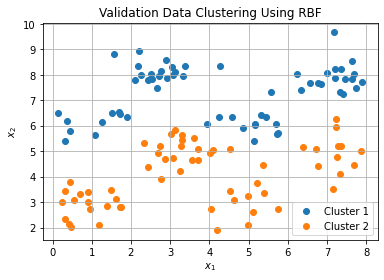

In [71]:
# test on validation data
y_pred = model.predict(data_val_norm)
fig, ax = plt.subplots()
clusterZeroIndices = np.where(y_pred < 0.5)[0]
clusterOneIndices = np.where(y_pred >= 0.5)[0]


# cluster zero val data
ax.scatter(data_val[clusterZeroIndices,0], data_val[clusterZeroIndices,1])

# cluster one val data
ax.scatter(data_val[clusterOneIndices,0], data_val[clusterOneIndices,1])

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Validation Data Clustering Using RBF')
ax.grid(True)
ax.legend(['Cluster 1','Cluster 2']);
plt.savefig('1.3.png')

In [73]:
# accuracy on validation data
y_pred = model.predict(data_val_norm)

y_pred[np.where(y_pred < 0.5)[0]] = 0
y_pred[np.where(y_pred >= 0.5)[0]] = 1

val_accuracy = np.count_nonzero((labels_val - y_pred) == 0)/ y_pred.shape[0] * 100
print(val_accuracy)

98.33333333333333
